In [1]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,Aladdin,Cars,Finding Nemo,Frozen,Tangled,The Little Mermaid,Toy Story,Toy Story 3,Up,Zootopia
ababwa,1,0,0,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,1
abdomen,0,0,0,0,0,1,0,0,0,0
abducted,0,0,1,0,0,0,0,0,0,0
abilities,0,0,1,3,0,0,0,0,0,0


In [2]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index,top.values))
    
top_dict

{'Aladdin': [('aladdin', 52),
  ('jafar', 28),
  ('genie', 22),
  ('lamp', 21),
  ('jasmine', 19),
  ('palace', 13),
  ('wish', 13),
  ('abu', 12),
  ('cave', 11),
  ('sultan', 11),
  ('prince', 10),
  ('aladdins', 8),
  ('claims', 7),
  ('using', 7),
  ('royal', 7),
  ('wishes', 6),
  ('street', 6),
  ('tells', 6),
  ('jafars', 5),
  ('away', 5),
  ('guards', 5),
  ('free', 5),
  ('diamond', 5),
  ('princess', 5),
  ('enter', 5),
  ('suddenly', 5),
  ('large', 5),
  ('marry', 5),
  ('carpet', 5),
  ('hes', 5)],
 'Cars': [('lightning', 69),
  ('doc', 24),
  ('mcqueen', 16),
  ('mack', 13),
  ('town', 12),
  ('race', 12),
  ('road', 11),
  ('lightnings', 10),
  ('radiator', 10),
  ('racing', 10),
  ('springs', 10),
  ('mater', 9),
  ('king', 9),
  ('piston', 9),
  ('pit', 8),
  ('cup', 8),
  ('chick', 7),
  ('crew', 7),
  ('lead', 6),
  ('luigi', 6),
  ('tires', 6),
  ('night', 6),
  ('sally', 6),
  ('hicks', 6),
  ('season', 6),
  ('stop', 5),
  ('causes', 5),
  ('sheriff', 5),
  ('tim

In [3]:
for movie,top_words in top_dict.items():
    print(movie)
    print(', '.join([word for word,count in top_words[0:14]]))
    print('-------')

Aladdin
aladdin, jafar, genie, lamp, jasmine, palace, wish, abu, cave, sultan, prince, aladdins, claims, using
-------
Cars
lightning, doc, mcqueen, mack, town, race, road, lightnings, radiator, racing, springs, mater, king, piston
-------
Finding Nemo
marlin, nemo, dory, fish, gill, tank, dentist, nigel, swim, sea, filter, water, school, boat
-------
Frozen
anna, elsa, kristoff, hans, ice, olaf, annas, snow, sven, elsas, marshmallow, powers, duke, quickly
-------
Tangled
rapunzel, gothel, flynn, eugene, mother, hair, tower, tells, satchel, tiara, brothers, maximus, takes, rapunzels
-------
The Little Mermaid
ariel, eric, ursula, human, triton, sebastian, surface, ariels, max, trident, wedding, flounder, voice, ursulas
-------
Toy Story
woody, buzz, toys, sid, andys, says, andy, toy, room, woodys, rc, hes, scud, bed
-------
Toy Story 3
toys, woody, lotso, andy, buzz, room, ken, box, sunnyside, andys, group, bonnie, soon, barbie
-------
Up
carl, russell, kevin, house, muntz, dug, falls,

In [4]:
from collections import Counter

words = []
for movie in data.columns:
    top = [word for (word,count) in top_dict[movie]]
    for t in top:
        words.append(t)
words

['aladdin',
 'jafar',
 'genie',
 'lamp',
 'jasmine',
 'palace',
 'wish',
 'abu',
 'cave',
 'sultan',
 'prince',
 'aladdins',
 'claims',
 'using',
 'royal',
 'wishes',
 'street',
 'tells',
 'jafars',
 'away',
 'guards',
 'free',
 'diamond',
 'princess',
 'enter',
 'suddenly',
 'large',
 'marry',
 'carpet',
 'hes',
 'lightning',
 'doc',
 'mcqueen',
 'mack',
 'town',
 'race',
 'road',
 'lightnings',
 'radiator',
 'racing',
 'springs',
 'mater',
 'king',
 'piston',
 'pit',
 'cup',
 'chick',
 'crew',
 'lead',
 'luigi',
 'tires',
 'night',
 'sally',
 'hicks',
 'season',
 'stop',
 'causes',
 'sheriff',
 'time',
 'comes',
 'marlin',
 'nemo',
 'dory',
 'fish',
 'gill',
 'tank',
 'dentist',
 'nigel',
 'swim',
 'sea',
 'filter',
 'water',
 'school',
 'boat',
 'squirt',
 'mask',
 'window',
 'suddenly',
 'away',
 'father',
 'whale',
 'takes',
 'harbor',
 'mouth',
 'son',
 'nemos',
 'peach',
 'large',
 'come',
 'sydney',
 'anna',
 'elsa',
 'kristoff',
 'hans',
 'ice',
 'olaf',
 'annas',
 'snow',
 's

In [5]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

In [6]:
'''So We Have No More Stop Words To Add'''

'So We Have No More Stop Words To Add'

In [7]:
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS

In [8]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words,background_color="white",colormap="Dark2",max_font_size=150,random_state=42)

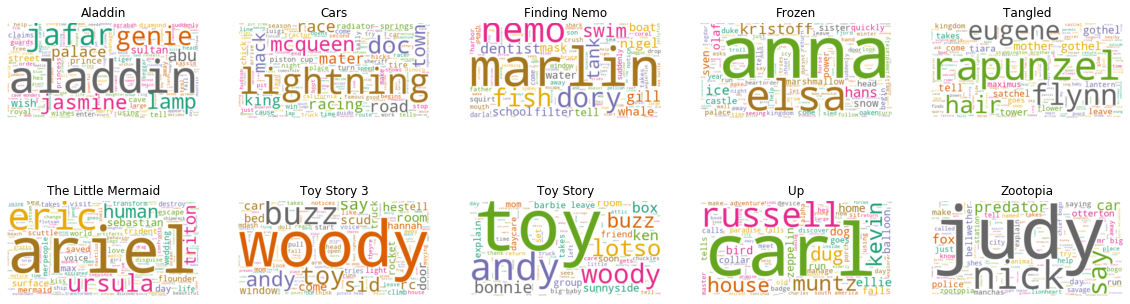

In [13]:
movies = ['Aladdin','Cars','Finding Nemo','Frozen','Tangled','The Little Mermaid','Toy Story 3','Toy Story','Up','Zootopia']
data_clean = pd.read_pickle('data_clean.pkl')
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[20,6]

for index,movie in enumerate(data.columns):
    wc.generate(data_clean.synopsis[movie])
    
    plt.subplot(2,5,index+1)
    plt.imshow(wc,interpolation="bilinear")
    plt.axis("off")
    plt.title(movies[index])
plt.show()